# Prediction of Subscription Churn in an Internet Service Provider

Churn Prediction allows us to detect those customers or users who are likely to unsubscribe from your service. Actions can be designed to achieve subscription retention. 

The purpose of this project is to create a model that allows us to identify those clients prone to canceling their internet service.

In [614]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [615]:
df = pd.read_csv('internet_service_churn.csv')
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [616]:
df.dtypes

id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
reamining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object

In [617]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [619]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [620]:
# Check for duplicates
df.nunique()

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
reamining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

In [621]:
# We don't need the customerID column
df.drop('id', axis='columns', inplace=True)

## Exploratory Data Analysis (EDA)

C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\1186827078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['churn'].value_counts().index, y=df['churn'].value_counts().values, palette='ch:2.5,-.2,dark=.3')


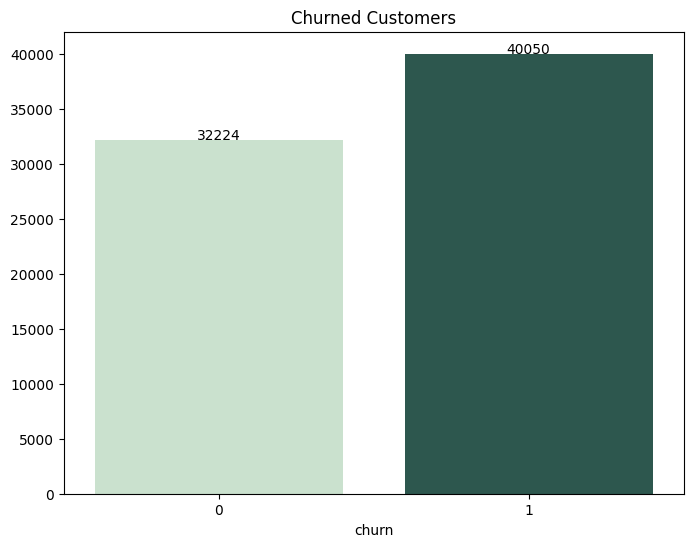

In [622]:
# How many customers already churned
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df['churn'].value_counts().index, y=df['churn'].value_counts().values, palette='ch:2.5,-.2,dark=.3')
plt.title('Churned Customers')

# Adding the text inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center')

plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\1625620286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['is_tv_subscriber'].value_counts().index, y=df['is_tv_subscriber'].value_counts().values, palette= 'ch:2.5,-.2,dark=.3')


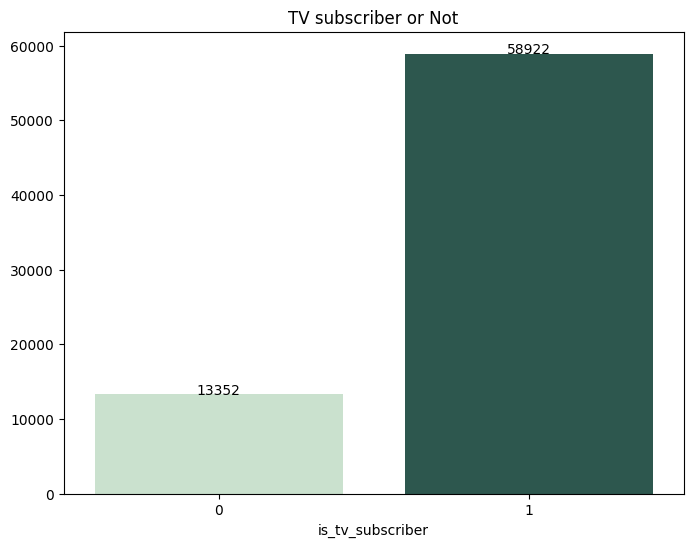

In [623]:
# Number of TV subscribers
plt.figure(figsize = (8,6))
ax = sns.barplot(x=df['is_tv_subscriber'].value_counts().index, y=df['is_tv_subscriber'].value_counts().values, palette= 'ch:2.5,-.2,dark=.3')
plt.title('TV subscriber or Not')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
    
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\3942026250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['is_movie_package_subscriber'].value_counts().index, y=df['is_movie_package_subscriber'].value_counts().values, palette= 'ch:2.5,-.2,dark=.3')


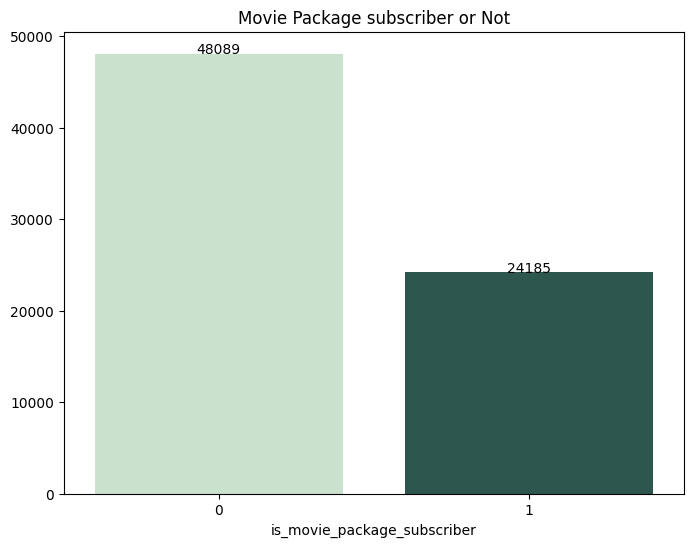

In [624]:
# Customers with Movie Package subscription
plt.figure(figsize = (8,6))
ax = sns.barplot(x=df['is_movie_package_subscriber'].value_counts().index, y=df['is_movie_package_subscriber'].value_counts().values, palette= 'ch:2.5,-.2,dark=.3')
plt.title('Movie Package subscriber or Not')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
    
plt.show()

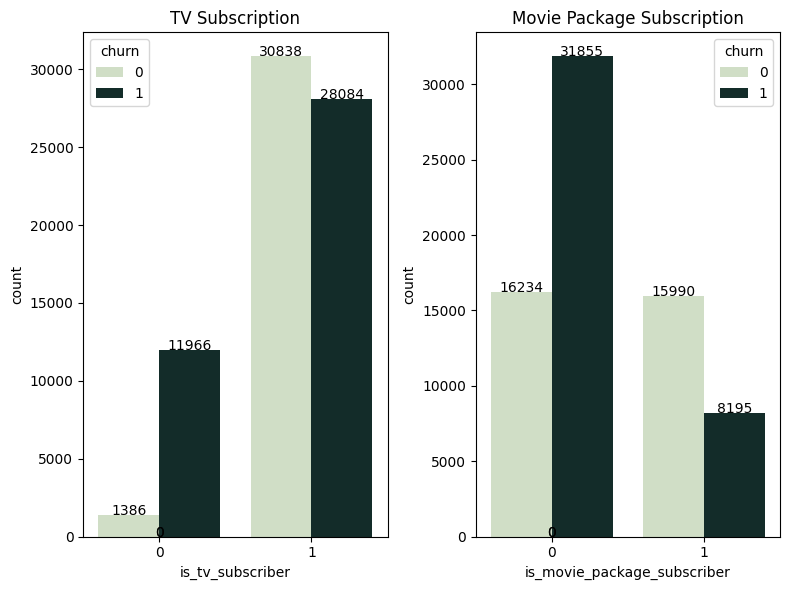

In [625]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Tv subscription or not
sns.countplot(data = df, x = 'is_tv_subscriber', hue = 'churn', palette= 'ch:start=2.5,rot=-.3', ax=axes[0])
axes[0].set_title("TV Subscription")

# Add numbers above the bars
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center')

# Movie package subscription or not
sns.countplot(data = df, x = 'is_movie_package_subscriber', hue = 'churn', palette= 'ch:start=2.5,rot=-.3', ax=axes[1])
axes[1].set_title('Movie Package Subscription')

# Add numbers above the bars
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center')

fig.tight_layout()

We can see that the customers who has TV subscription cancelled the service, but the customers who cancelled the service doesn't use to have Movie pack subscription.

In [626]:
print(df['service_failure_count'].value_counts())


service_failure_count
0     60407
1      7665
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
19        1
18        1
Name: count, dtype: int64


C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\3568218011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=2.5,rot=-.3')


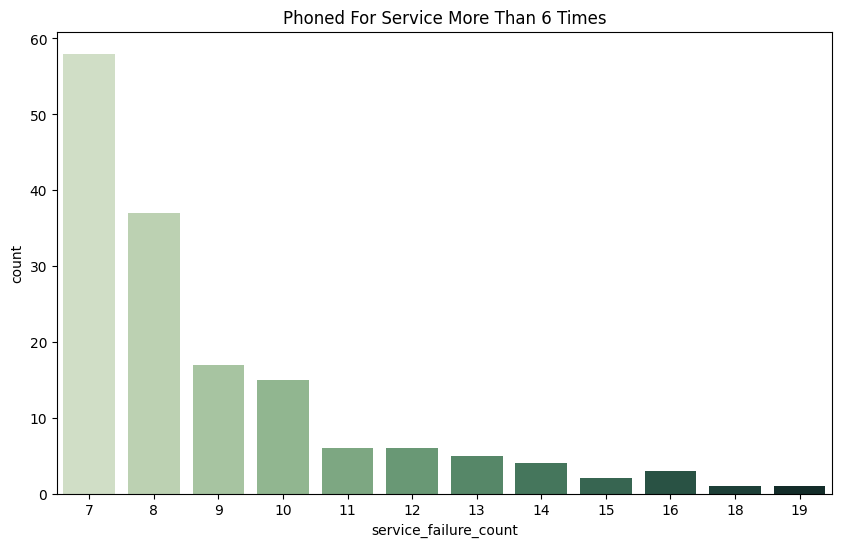

In [627]:
data = df[df['service_failure_count'] > 6]
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=2.5,rot=-.3')
plt.title('Phoned For Service More Than 6 Times')
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\4029081673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=2.5,rot=-.3')


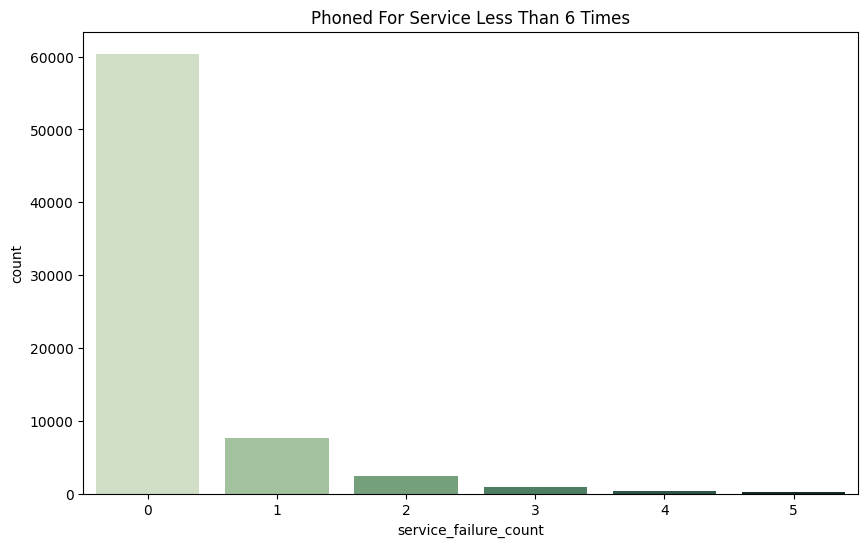

In [628]:
data = df[df['service_failure_count'] < 6]
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=2.5,rot=-.3')
plt.title('Phoned For Service Less Than 6 Times')
plt.show()

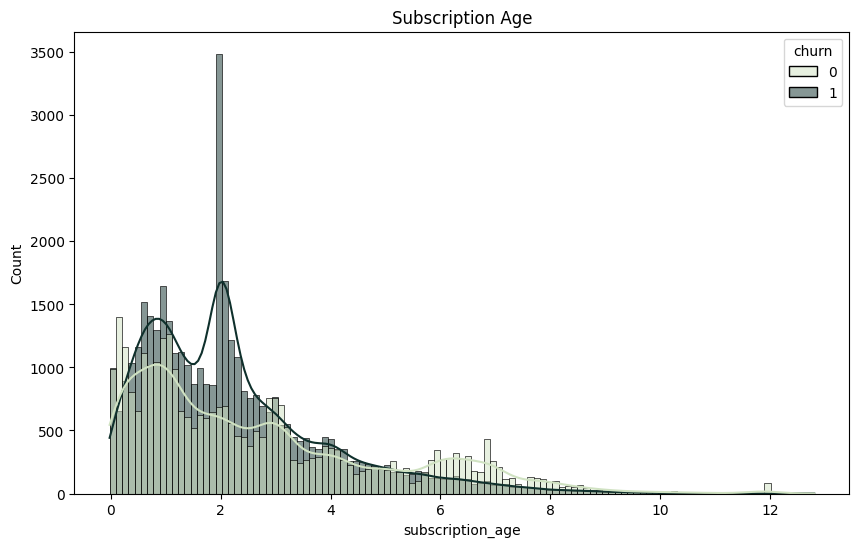

In [629]:
# How the subscription_age is distributed for churned and non-churned customers

plt.figure(figsize = (10,6))
sns.histplot(data=df, x='subscription_age', hue='churn', kde=True, palette='ch:start=2.5,rot=-.3')
plt.title('Subscription Age')
plt.show()

<Figure size 1000x600 with 0 Axes>

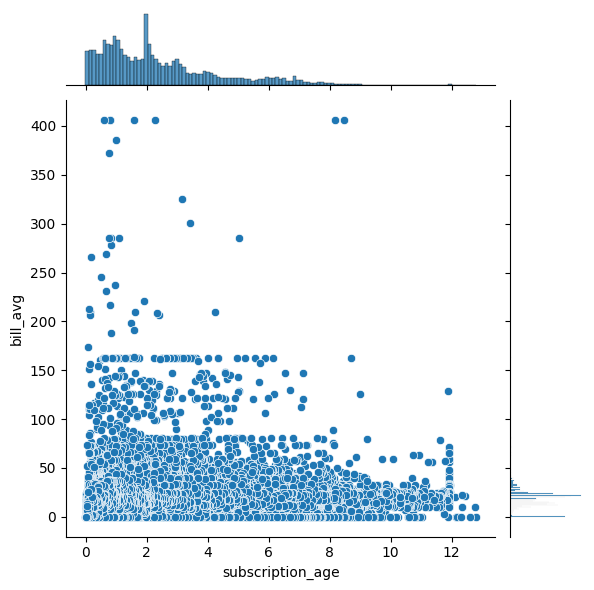

In [630]:
# Jointplot to see the age and average bill amount at time
plt.figure(figsize = (10,6))
sns.jointplot(data=df, x='subscription_age', y='bill_avg', palette='ch:start=2.5,rot=-.3')

Here we can see that most of the customer who has just started the service has higher average bill and most older customer has lower average bill. This can be depend on the speed and package the customer has.

C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\2174772821.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='download_avg', y='upload_avg', palette='ch:start=2.5,rot=-.3')


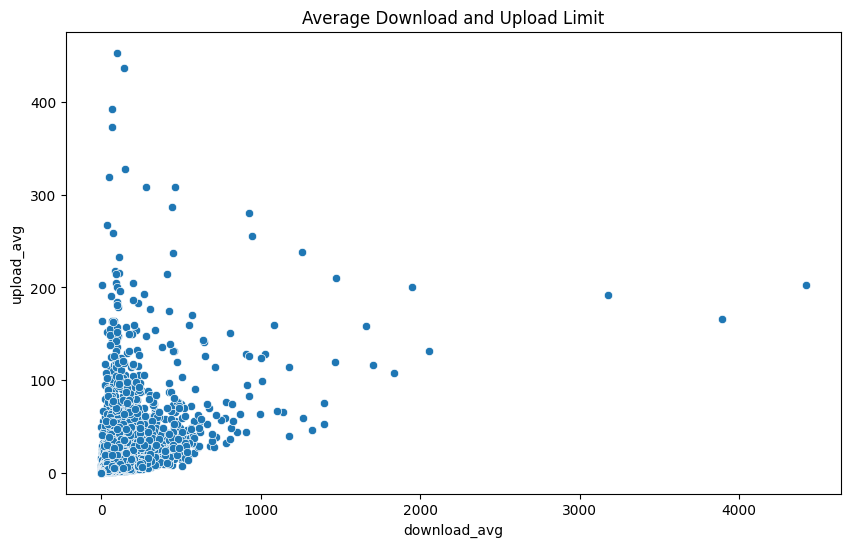

In [631]:
# Average download and upload limit
plt.figure(figsize = (10,6))
sns.scatterplot(data=df, x='download_avg', y='upload_avg', palette='ch:start=2.5,rot=-.3')
plt.title('Average Download and Upload Limit')
plt.show()

Here most of the download and upload speed relay within 1000 and 100 and we there are some exceptional data point which may be outliers in the dataset.

C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\239066577.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=var, x='churn', palette='ch:start=2.5,rot=-.3', ax=axes[i])
C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\239066577.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=var, x='churn', palette='ch:start=2.5,rot=-.3', ax=axes[i])
C:\Users\eduar\AppData\Local\Temp\ipykernel_17668\239066577.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=var, x='churn', palette='ch:start=2.5,rot=-.3', ax=axes[i]

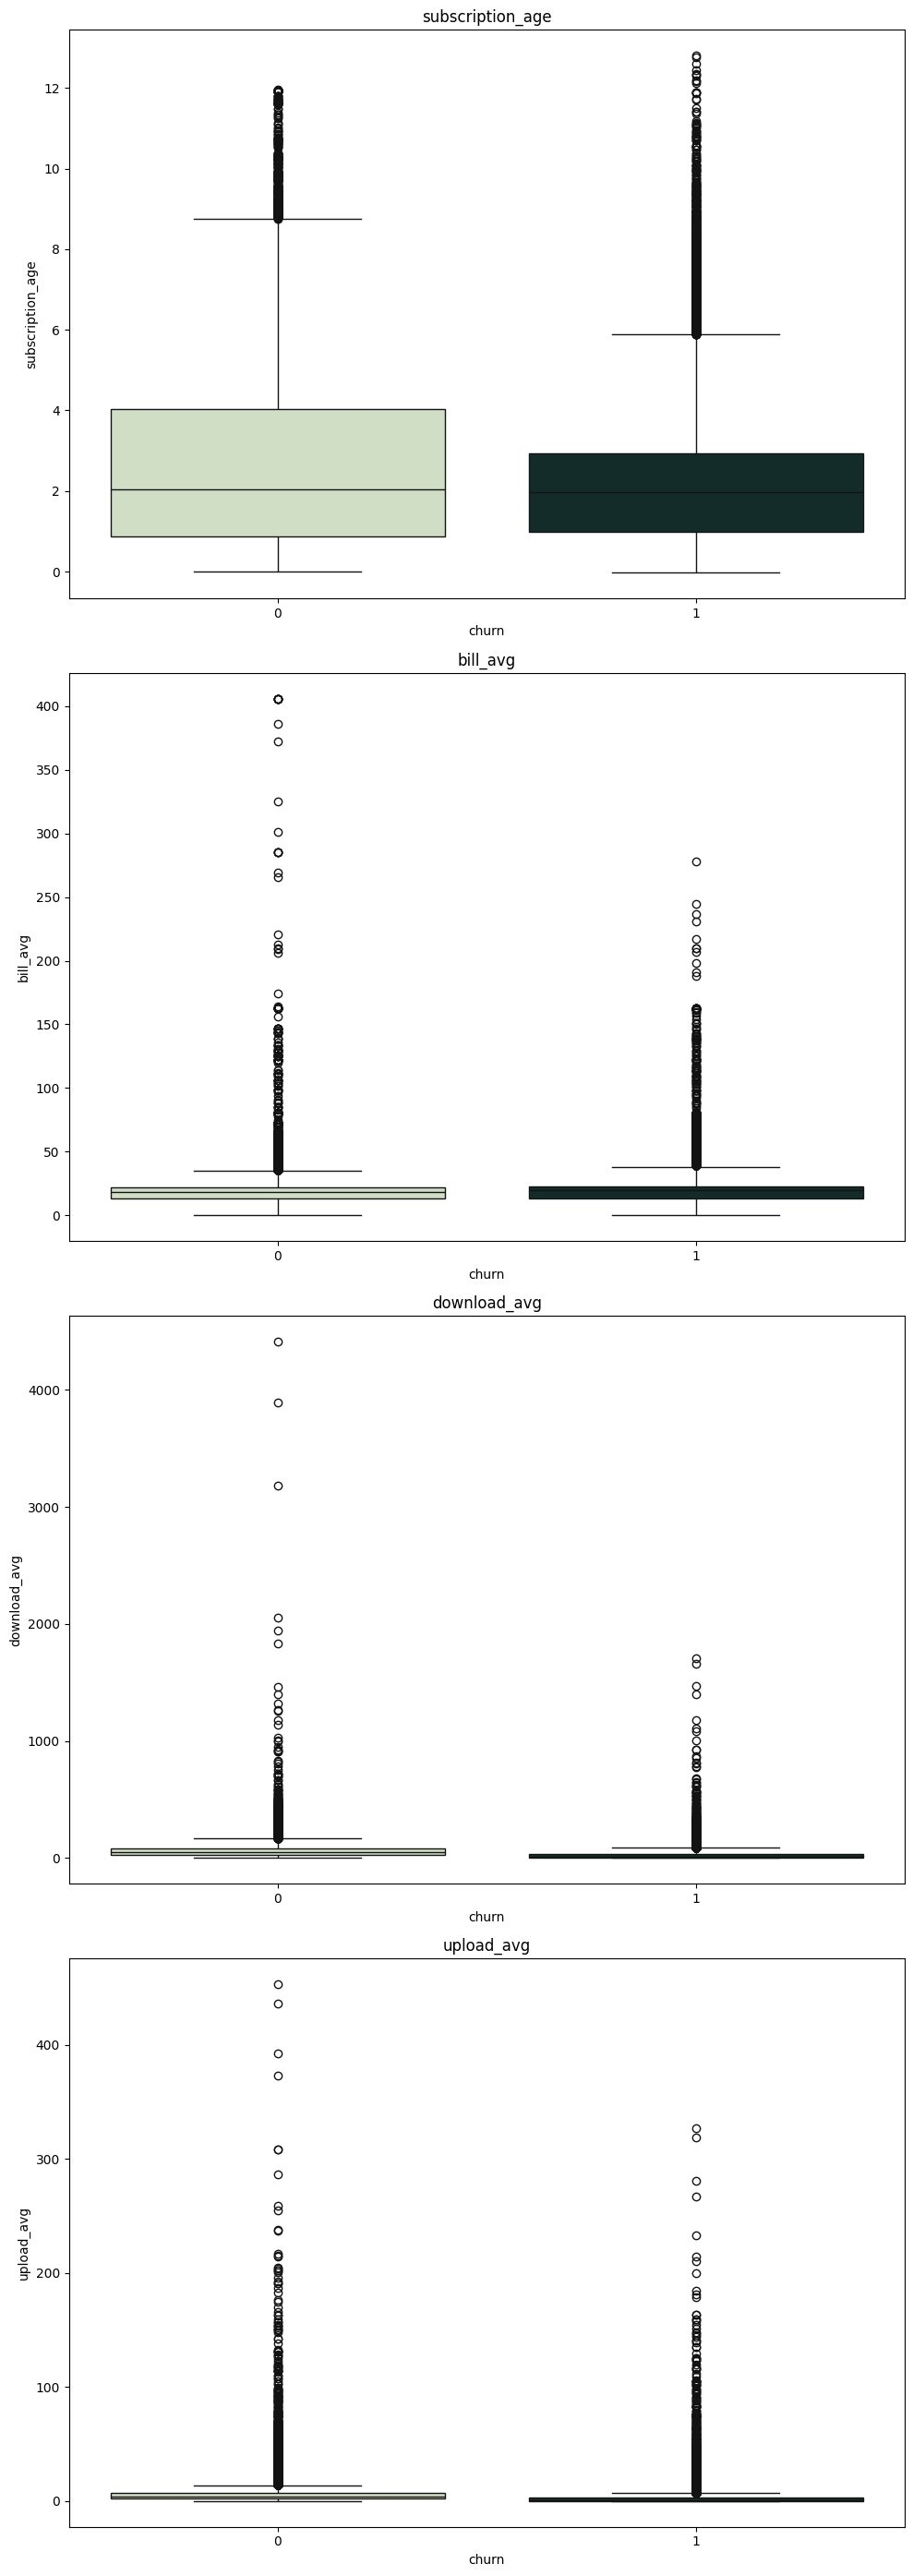

In [632]:
# Boxplot to see if there is outliers in the data
def boxplots(vars):
    n = len(vars)
    fig, axes = plt.subplots(n, 1, figsize=(10, 7*n))
    
    for i, var in enumerate(vars):
        sns.boxplot(data=df, y=var, x='churn', palette='ch:start=2.5,rot=-.3', ax=axes[i])
        axes[i].set_title(var)
    
    plt.tight_layout()
    plt.show()

boxplots(['subscription_age', 'bill_avg', 'download_avg', 'upload_avg'])

We can see for each feature we've some outliers. Now we use a heatmap to see the correlation in the dataset

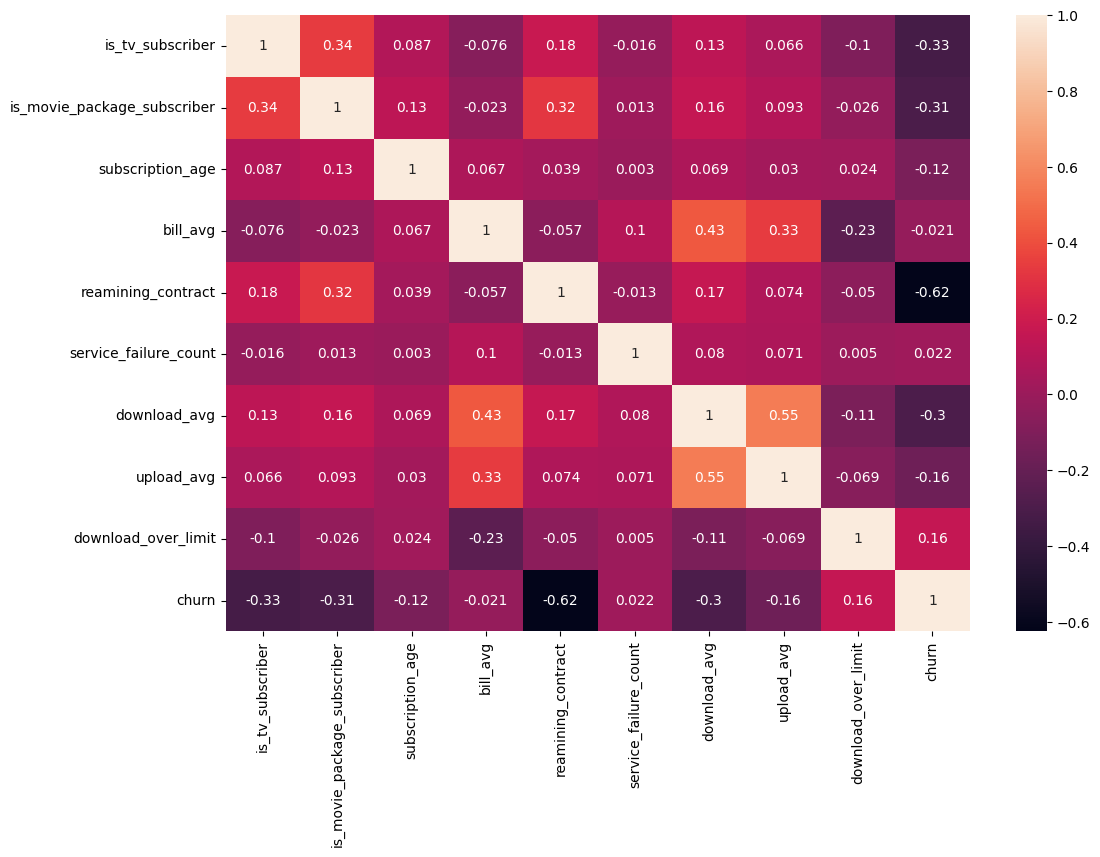

In [633]:
plt.figure(figsize = (12,8))
sns.heatmap(np.round(df.corr(), 3), annot= True)
plt.show()

In [634]:
correlation=df.corr()
correlation

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
is_tv_subscriber,1.000000,0.337435,0.087276,-0.076245,0.178814,-0.016041,0.131650,0.065791,-0.103546,-0.327582
is_movie_package_subscriber,0.337435,1.000000,0.131986,-0.022534,0.319179,0.013345,0.160590,0.093251,-0.026352,-0.307167
subscription_age,0.087276,0.131986,1.000000,0.067329,0.039269,0.003449,0.069331,0.030277,0.023694,-0.122441
bill_avg,-0.076245,-0.022534,0.067329,1.000000,-0.057088,0.101270,0.431674,0.334236,-0.232738,-0.021058
reamining_contract,0.178814,0.319179,0.039269,-0.057088,1.000000,-0.012571,0.167568,0.073651,-0.050014,-0.625450
service_failure_count,-0.016041,0.013345,0.003449,0.101270,-0.012571,1.000000,0.080483,0.070699,0.004947,0.021575
download_avg,0.131650,0.160590,0.069331,0.431674,0.167568,0.080483,1.000000,0.554436,-0.114322,-0.298063
upload_avg,0.065791,0.093251,0.030277,0.334236,0.073651,0.070699,0.554436,1.000000,-0.069192,-0.162690
download_over_limit,-0.103546,-0.026352,0.023694,-0.232738,-0.050014,0.004947,-0.114322,-0.069192,1.000000,0.158318
churn,-0.327582,-0.307167,-0.122441,-0.021058,-0.625450,0.021575,-0.298063,-0.162690,0.158318,1.000000


## Data Cleaning and preparation

In [635]:
df.isnull().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [636]:
# Filling the missing values in reamining_contract with the median and mean for the rest 
df['reamining_contract'] = df['reamining_contract'].fillna(df['reamining_contract'].median())
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].mean())

df.isnull().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

## Feature Selection

In [637]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df["subscription_age"]=[abs(i) for i in df["subscription_age"]]
y=df["churn"]
x=df.loc[:,["is_tv_subscriber","is_movie_package_subscriber","subscription_age","bill_avg","reamining_contract","service_failure_count","download_avg","upload_avg","download_over_limit"]]
bestcolumns=SelectKBest(score_func=chi2,k="all")
fit=bestcolumns.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featureScores=pd.concat([dfcolumns,df_scores],axis=1)
featureScores.columns=["Features","scores"]
featureScores

,Features,scores
0,is_tv_subscriber,1432.804997
1,is_movie_package_subscriber,4537.277652
2,subscription_age,1831.361344
3,bill_avg,295.488380
4,reamining_contract,11928.681636
5,service_failure_count,81.804756
6,download_avg,583856.670011
7,upload_avg,43473.686030
8,download_over_limit,8675.261784


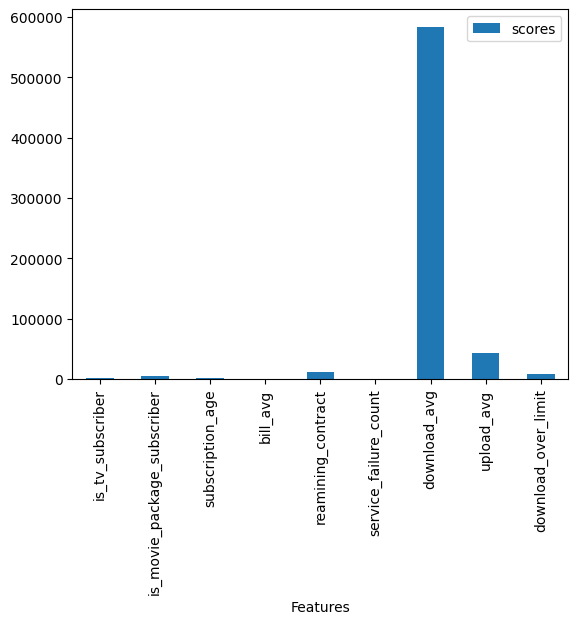

In [638]:
featureScores.plot.bar(x="Features",y="scores") #using chi method for feature selection
plt.show()

In [639]:
from sklearn.feature_selection import mutual_info_classif
important_features =mutual_info_classif(x,y)
feat_importances=pd.Series(important_features,df.columns[0:len(df.columns)-1])
feat_importances

is_tv_subscriber               0.069151
is_movie_package_subscriber    0.054742
subscription_age               0.053221
bill_avg                       0.070991
reamining_contract             0.431043
service_failure_count          0.002456
download_avg                   0.153033
upload_avg                     0.145211
download_over_limit            0.018291
dtype: float64

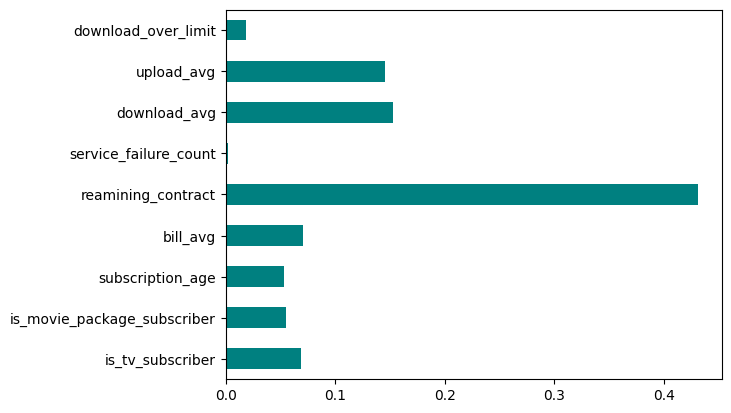

In [640]:
feat_importances.plot.barh(color="teal")
plt.show()

In [641]:
# Import model libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [642]:
# Normalize feature vector
X2 = StandardScaler().fit_transform(x)

In [643]:
x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

In [644]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [645]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

<Axes: >

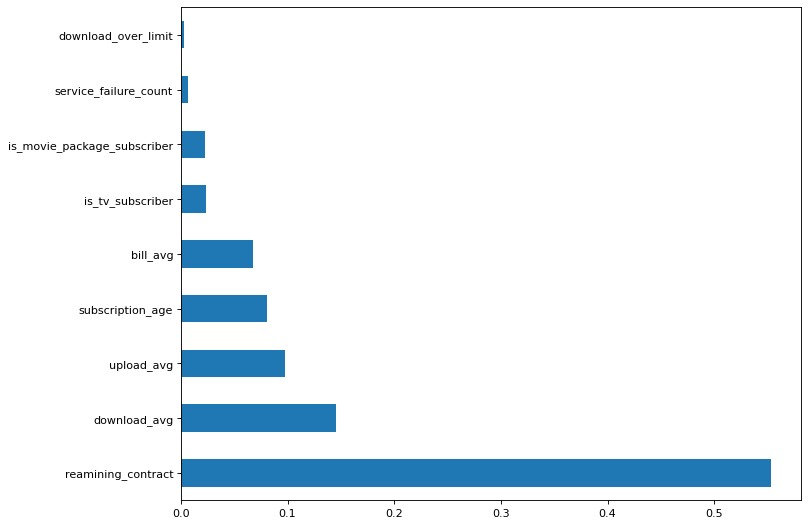

In [646]:
plt.figure(num=None, figsize=(10,8), dpi=80)

feat_importances = pd.Series(clf.feature_importances_, index= x.columns)

feat_importances.nlargest(10).plot(kind='barh')

In [647]:
df.reset_index()

,index,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,1,0,0,8.22,0,0.57,0,0.0,0.0,0,1
2,2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,3,0,0,6.87,21,0.57,1,0.0,0.0,0,1
4,4,0,0,6.39,0,0.57,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [648]:
from sklearn.tree import DecisionTreeClassifier
df2=df.loc[:,["is_tv_subscriber", "is_movie_package_subscriber", "subscription_age","bill_avg","reamining_contract","download_avg","upload_avg","churn"]]
df2=df2.reset_index()
df2

,index,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg,churn
0,0,1,0,11.95,25,0.14,8.4,2.3,0
1,1,0,0,8.22,0,0.57,0.0,0.0,1
2,2,1,0,8.91,16,0.00,13.7,0.9,1
3,3,0,0,6.87,21,0.57,0.0,0.0,1
4,4,0,0,6.39,0,0.57,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
72269,72269,1,1,0.09,0,1.25,0.0,0.0,1
72270,72270,1,0,0.06,1,1.63,0.8,0.0,1
72271,72271,1,0,0.02,0,2.19,1.5,0.2,1
72272,72272,0,0,0.01,0,0.72,0.0,0.0,1


In [649]:
a=df2.loc[:,["is_tv_subscriber", "is_movie_package_subscriber", "subscription_age","bill_avg","reamining_contract","download_avg","upload_avg"]]
y=df2["churn"]
#Using the train_test_split to create train and test sets.
a_train, a_test, y_train, y_test = train_test_split(a, y, random_state = 50, test_size = 0.25)
a

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg
0,1,0,11.95,25,0.14,8.4,2.3
1,0,0,8.22,0,0.57,0.0,0.0
2,1,0,8.91,16,0.00,13.7,0.9
3,0,0,6.87,21,0.57,0.0,0.0
4,0,0,6.39,0,0.57,0.0,0.0
...,...,...,...,...,...,...,...
72269,1,1,0.09,0,1.25,0.0,0.0
72270,1,0,0.06,1,1.63,0.8,0.0
72271,1,0,0.02,0,2.19,1.5,0.2
72272,0,0,0.01,0,0.72,0.0,0.0


In [650]:
clf = DecisionTreeClassifier(criterion = 'entropy')
#Training the decision tree classifier. 
clf.fit(a_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [651]:
import joblib

# Guardar el modelo
joblib.dump(clf, 'modelo_churn.joblib')

['modelo_churn.joblib']

In [652]:
y_pred=clf.predict(a_train)
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [653]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(a_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(a_test)))

Accuracy Score on train data:  0.9999815515173877
Accuracy Score on test data:  0.9160993967568765


In [654]:
# Creating some predictions.
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, a_train, y_train, cv=3)

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_train, y_train_pred)
matrix

array([[21737,  2424],
       [ 2467, 27577]], dtype=int64)

In [655]:
confusion_matrix(y_test,clf.predict(a_test))

array([[7285,  778],
       [ 738, 9268]], dtype=int64)

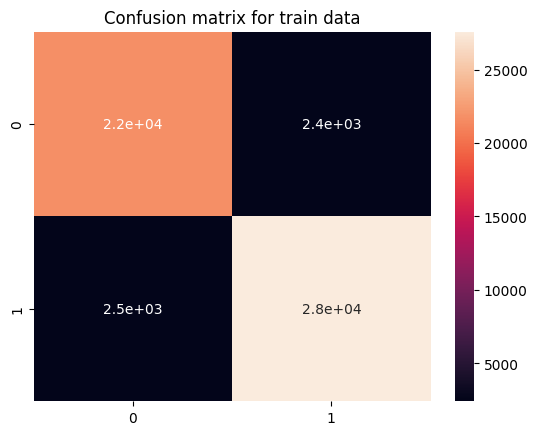

In [656]:
sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True);
plt.title("Confusion matrix for train data");plt.show()

In [657]:
print("accuracy using confusion matrix for train data =" , (matrix[0,0]+matrix[1,1])*100/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0]))
matrix2=confusion_matrix(y_test,clf.predict(a_test))

print("accuracy using confusion matrix for test data =" , (matrix2[0,0]+matrix2[1,1])*100/(matrix2[0,0]+matrix2[1,1]+matrix2[0,1]+matrix2[1,0]))

accuracy using confusion matrix for train data = 90.97684715432156
accuracy using confusion matrix for test data = 91.60993967568764
